In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)
utils.set_namespace('00-utils-test')

In [2]:
train_dl, valid_dl, test_dl, class_names = utils.make_cifar_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


tulip


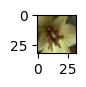

In [3]:
img, label = next(iter(test_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(0.5,0.5))
ax.imshow(img)
print(class_names[label[id]])
display()

In [4]:
class TestNetwork(torch.nn.Module):
    def __init__(self, class_num):
        super().__init__()
        self.backbone = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.AdaptiveAvgPool2d(output_size=1),
        )
        self.head = torch.nn.Linear(in_features=16, out_features=class_num)

    def forward(self, x: torch.Tensor):
        x = self.backbone(x)
        x = x.view(-1, 16)
        x = self.head(x)
        return x

In [5]:
cifar_model = utils.register_model('cifar-model', TestNetwork(100), 'Testing CIFAR-100')
cifar_model.setup(optimizer_cls=torch.optim.Adam, loss_fn_cls=torch.nn.CrossEntropyLoss)

Loaded model cifar-model from checkpoint. epoch=10, step=7040. train_loss=4.1746, train_accuracy=0.0654, val_loss=4.1634, val_accuracy=0.0704
cifar-model registered.
Trainable params: 2.15 k. Untrainable params: 0.00. Buffers: 0.00.
Skipped compilation


TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=100, bias=True)
)

In [6]:
cifar_model.train(train_dl, valid_dl, epochs=2, metrics=[utils.metric_accuracy])

Best loss: 4.1792


100%|██████████| 79/79 [00:00<00:00, 226.85it/s]


Epoch 1/2: train_loss=4.1641, train_accuracy=0.0655, val_loss=4.1700, val_accuracy=0.0660
Saved checkpoint for cifar-model. epoch=11, step=7744. train_loss=4.1641, train_accuracy=0.0655, val_loss=4.1700, val_accuracy=0.0660


100%|██████████| 79/79 [00:00<00:00, 236.11it/s]

Epoch 2/2: train_loss=4.1559, train_accuracy=0.0686, val_loss=4.1645, val_accuracy=0.0694
Saved checkpoint for cifar-model. epoch=12, step=8448. train_loss=4.1559, train_accuracy=0.0686, val_loss=4.1645, val_accuracy=0.0694
Loaded model cifar-model from checkpoint. epoch=12, step=8448. train_loss=4.1559, train_accuracy=0.0686, val_loss=4.1645, val_accuracy=0.0694


defaultdict(<function utils.ModelLifecycle.train.<locals>.<lambda>()>,
            {'epoch': [11, 12],
             'train_loss': [4.164147049797906, 4.15586457540724],
             'train_accuracy': [0.06553333333333333, 0.06855555555555555],
             'val_loss': [4.170028779983521, 4.164532174301147],
             'val_accuracy': [0.066, 0.0694]})

In [103]:
cifar_model.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 4.334405844116211, 'accuracy': 0.0339}

In [104]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders()
print(len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset))

90000 10000 10000


In [105]:
sum_pixels = torch.zeros(3)
sum_squared_pixels = torch.zeros(3)
total_pixels = 0

for images, _ in train_dl:
    for i in range(3):  # for each channel
        sum_pixels[i] += images[:, i, :, :].sum()
        sum_squared_pixels[i] += (images[:, i, :, :]**2).sum()

    total_pixels += torch.numel(images[:, 0, :, :])  # increment by the number of pixels in a batch

# Compute mean and standard deviation
mean = sum_pixels / total_pixels
std = torch.sqrt((sum_squared_pixels / total_pixels) - (mean**2))

mean, std

(tensor([0.4802, 0.4479, 0.3973]), tensor([0.2766, 0.2690, 0.2817]))

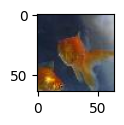

In [106]:
img, label = next(iter(test_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(img)
display()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


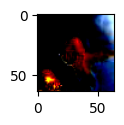

In [107]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders(normalize=True)
img, label = next(iter(test_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(img)
display()

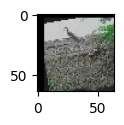

In [108]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders(augment=True)
img, label = next(iter(train_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(img)
display()

In [113]:
tiny_imagenet_model = utils.register_model('tiny-image-model', TestNetwork(200))
tiny_imagenet_model.setup(optimizer_cls=torch.optim.Adam, optimizer_args={'lr': 1e-4}, loss_fn_cls=torch.nn.CrossEntropyLoss)

tiny-image-model loaded from memory.
Trainable params: 3.85 k. Untrainable params: 0.00. Buffers: 0.00.
Skipped compilation


TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=200, bias=True)
)

In [115]:
tiny_imagenet_model.train(train_dl, valid_dl, metrics=[utils.metric_accuracy], epochs=2)

Best loss: 5.2940


100%|██████████| 157/157 [00:01<00:00, 125.45it/s]


Epoch 1/2: train_loss=5.2899, train_accuracy=0.0105, val_loss=5.2801, val_accuracy=0.0120
Saved checkpoint for tiny-image-model. epoch=3, step=4221. train_loss=5.289900, train_accuracy=0.010456, val_loss=5.280141, val_accuracy=0.012000


100%|██████████| 157/157 [00:01<00:00, 154.67it/s]

Epoch 2/2: train_loss=5.2773, train_accuracy=0.0121, val_loss=5.2643, val_accuracy=0.0119
Saved checkpoint for tiny-image-model. epoch=4, step=5628. train_loss=5.277312, train_accuracy=0.012111, val_loss=5.264268, val_accuracy=0.011900
Loaded model tiny-image-model from checkpoint. epoch=4, step=5628. train_loss=5.277312, train_accuracy=0.012111, val_loss=5.264268, val_accuracy=0.011900


defaultdict(<function utils.ModelLifecycle.train.<locals>.<lambda>()>,
            {'epoch': [3, 4],
             'train_loss': [5.289900268215603, 5.277312267812093],
             'train_accuracy': [0.010455555555555555, 0.01211111111111111],
             'val_loss': [5.280140902709961, 5.264268253326416],
             'val_accuracy': [0.012, 0.0119]})

In [117]:
tiny_imagenet_model.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 5.263682795715332, 'accuracy': 0.0115}